In [3]:
#Exo10
# Exercise: The classic faces faces dataset contains 400 grayscale 64 × 64–pixel images of faces. 
# Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), 
# and the usual task is to train a model that can predict which person is represented in each picture. 
# Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function.

In [4]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(data_home="OlivettiFaces")
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [8]:
X_faces = faces.data
y_faces = faces.target

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(faces.data,
                                                   faces.target))
X_train_valid = faces.data[train_valid_idx]
y_train_valid = faces.target[train_valid_idx]
X_test = faces.data[test_idx]
y_test = faces.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

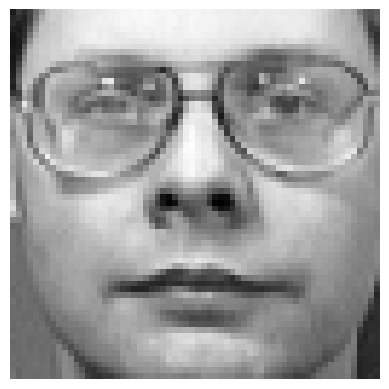

In [10]:
import matplotlib.pyplot as plt
import random

image = X_train[random.randint(0,250)]
image = image.reshape(64,64)

plt.imshow(image, cmap="grey")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

#cuz im smart ill try the inertia score to know what model to pick

models = [KMeans(n_clusters=n, n_init=10, random_state=67).fit(X_train) for n in range(5,150,5)]


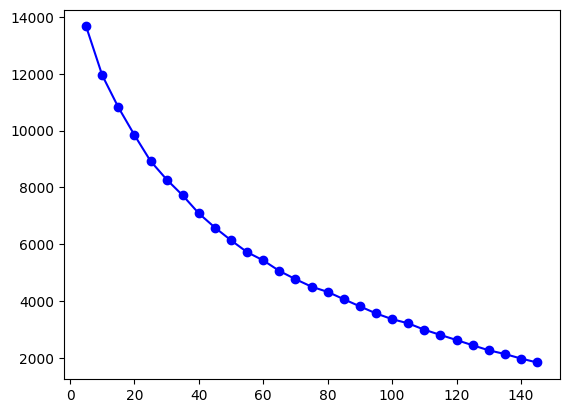

[KMeans(n_clusters=5, n_init=10, random_state=67), KMeans(n_clusters=10, n_init=10, random_state=67), KMeans(n_clusters=15, n_init=10, random_state=67), KMeans(n_clusters=20, n_init=10, random_state=67), KMeans(n_clusters=25, n_init=10, random_state=67), KMeans(n_clusters=30, n_init=10, random_state=67), KMeans(n_clusters=35, n_init=10, random_state=67), KMeans(n_clusters=40, n_init=10, random_state=67), KMeans(n_clusters=45, n_init=10, random_state=67), KMeans(n_clusters=50, n_init=10, random_state=67), KMeans(n_clusters=55, n_init=10, random_state=67), KMeans(n_clusters=60, n_init=10, random_state=67), KMeans(n_clusters=65, n_init=10, random_state=67), KMeans(n_clusters=70, n_init=10, random_state=67), KMeans(n_clusters=75, n_init=10, random_state=67), KMeans(n_clusters=80, n_init=10, random_state=67), KMeans(n_clusters=85, n_init=10, random_state=67), KMeans(n_clusters=90, n_init=10, random_state=67), KMeans(n_clusters=95, n_init=10, random_state=67), KMeans(n_clusters=100, n_init=1

In [ ]:
inertia_scores = [model.inertia_ for model in models]


plt.plot(range(5,150,5), inertia_scores, "bo-") #kinda dumb tbh im expecting to see 10 clusters
plt.show()
print(models)

In [ ]:
models[0].inertia_

20247.046875

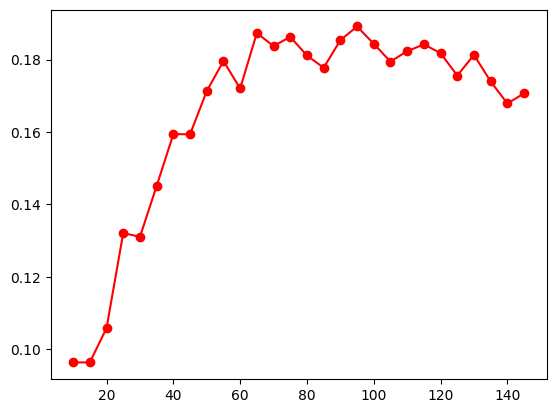

In [ ]:
from sklearn.metrics import silhouette_score #z3ma nta m9wd


silhouette_scores = [silhouette_score(X_train, model.labels_) for model in models[1:]]

plt.plot(range(10,150,5), silhouette_scores, "ro-") 
plt.show()

# 120?????????????????????????????????????

In [10]:
from sklearn.cluster import KMeans

my_goat = KMeans(n_clusters=90, n_init=10, random_state=67).fit(X_train)

In [ ]:
unique_labels = np.unique(my_goat.labels_)
max_per_cluster = 10

fig, axes = plt.subplots(len(unique_labels), max_per_cluster, 
                        figsize=(15, 2 * len(unique_labels)))

for row, label in enumerate(unique_labels):    
    cluster_imgs = X_train[my_goat.labels_ == label]
    
    for col in range(max_per_cluster):
        if col < len(cluster_imgs):
            axes[row, col].imshow(cluster_imgs[col].reshape(64, 64), cmap="gray")
        axes[row, col].axis('off')  # This removes axes for ALL subplots

plt.tight_layout()
plt.show() #handsome people 

In [ ]:
np.unique(my_goat.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

In [ ]:
# Part 2 train a classifier then compare its score with kmeans dimensionality reduction

In [13]:
X_reduced = my_goat.transform(X_train)
X_valid_reduced = my_goat.transform(X_valid)
X_reduced

array([[13.109152 , 13.3636465, 11.737259 , ..., 12.397172 , 14.78857  ,
        11.632876 ],
       [11.0327835, 16.298151 , 14.860307 , ..., 14.921738 , 16.307835 ,
        13.819749 ],
       [15.974372 ,  9.569901 , 10.400631 , ..., 11.620384 , 14.051442 ,
        13.5907345],
       ...,
       [ 2.6480117, 10.477685 ,  9.8621025, ..., 10.533451 , 11.534765 ,
        11.3696375],
       [11.322338 ,  9.645307 ,  9.354773 , ...,  8.198796 , 11.465593 ,
        12.573157 ],
       [11.492297 ,  8.7181835,  7.5743194, ...,  9.048761 , 12.535541 ,
         8.307958 ]], dtype=float32)

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=67)
forest.fit(X_train, y_train)
forest.score(X_valid, y_valid)

0.925

In [15]:
forest.fit(X_reduced, y_train)
forest.score(X_valid_reduced, y_valid)

0.825

In [17]:
import numpy as np
X_combined = np.c_[X_train, X_reduced]
X_valid_combined = np.c_[X_valid, X_valid_reduced]

forest.fit(X_combined, y_train)
forest.score(X_valid_combined, y_valid)

0.925

In [6]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=67)
gm.fit(X_train)

GaussianMixture(n_components=40, random_state=67)

In [19]:
sample = gm.sample(4)

fig, axis = plt.subplots(2,2)

axis[0,0].imshow(sample[0].reshape(64,64))
axis[0,0].axis('off')
axis[0,1].imshow(sample[1].reshape(64,64))
axis[0,1].axis('off')
axis[1,0].imshow(sample[2].reshape(64,64))
axis[1,0].axis('off')
axis[1,1].imshow(sample[3].reshape(64,64))
axis[1,1].axis('off')

plt.show()

: 

: 

In [7]:
sample, y_target = gm.sample()
sample